# Improving the Network Architecture of Assignment 4_B for an increased accuracy

## **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras #Update Keras
import keras #Import the Keras

In [0]:
import numpy as np #Import numpy and provide alias as np

from keras.models import Sequential #Import sequential from keras models to create sequential model
from keras.layers import Dense, Dropout, Activation, Flatten, Add #import dense, activation, flatten and add from keras layer
from keras.layers import Convolution2D, MaxPooling2D #import Convolution2D and Maxpooling2D from keras layers
from keras.utils import np_utils #Import np_utils from keras to convert array to binary one hot vector

from keras.datasets import mnist #Import mnist data

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


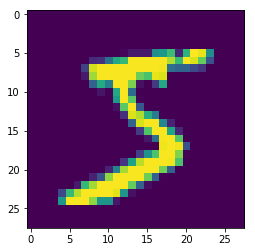

In [13]:
print (X_train.shape) #Print shape of the train dataframe
from matplotlib import pyplot as plt #Import pyplot as plt from matplotlib
%matplotlib inline 
plt.imshow(X_train[0]) #Show/Print the image

## Train Test reshaping data

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

##Data Normalization

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]

In [16]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [18]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Vanilla Model Architecture

In [20]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())


model.add(Convolution2D(16, 1, 1, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) # 12


model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())
model.add(Convolution2D(10, 4, 4)) #1
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0616 10:53:49.522610 140630321153920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0616 10:53:49.523762 140630321153920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0616 10:53:50.356297 140630321153920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7:

###Model Summary

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2320      
__________

###Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 

###Training the Model

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 25s 412us/step - loss: 0.0318 - acc: 0.9912
Epoch 2/15
60000/60000 [==============================] - 24s 396us/step - loss: 0.0292 - acc: 0.9922
Epoch 3/15
60000/60000 [==============================] - 24s 392us/step - loss: 0.0273 - acc: 0.9922
Epoch 4/15
60000/60000 [==============================] - 23s 388us/step - loss: 0.0260 - acc: 0.9927
Epoch 5/15
60000/60000 [==============================] - 24s 392us/step - loss: 0.0245 - acc: 0.9928
Epoch 6/15
60000/60000 [==============================] - 24s 393us/step - loss: 0.0231 - acc: 0.9937
Epoch 7/15
60000/60000 [==============================] - 24s 393us/step - loss: 0.0216 - acc: 0.9936
Epoch 8/15
60000/60000 [==============================] - 23s 387us/step - loss: 0.0203 - acc: 0.9940
Epoch 9/15
60000/60000 [==============================] - 23s 387us/step - loss: 0.0198 - acc: 0.9946
Epoch 10/15
60000/60000 [==============================] - 23s 390us/step - loss: 

###Score the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

###Print Score Accuracy

In [29]:
print(score)

[0.027101527856697793, 0.9931]


###Conclusion

###The Improvement on 2nd Network has been performed by using the 
###MaxPooling, 
###1X1 Convolution, 
###Batch Normalisation 
###reducing the number of Parameters to 19210 from 30K

###98.19% to 99.31%